# 🛳 Titanic Survival Prediction | Kaggle Challenge

## 1. 📌 Project Overview
- Objective: Predict survival of passengers aboard Titanic based on demographic & socio-economic data.
- Dataset: Provided by [Kaggle Titanic Competition](https://www.kaggle.com/competitions/titanic)

---

## 📎 Links
- [Competition Page](https://www.kaggle.com/competitions/titanic)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Disable chained assignment warnings in Pandas (e.g., when modifying slices of a DataFrame)
pd.options.mode.chained_assignment = None  # Default is 'warn'

# Suppress FutureWarning messages globally (commonly triggered by deprecated features or upcoming changes)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 2. 📊 Data Description

| Column | Description |
|-------|------------|
| PassengerId | Unique ID |
| Survived | Survival (0 = No, 1 = Yes) |
| Pclass | Ticket class (1st, 2nd, 3rd) |
| Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked | Passenger info |

---

In [2]:
# Load dataests
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Check basic structure of train data
print(train.info())  # Data types and missing values
print(train.describe())  # Statistical summary
print(train.head()) # First 10 lines of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## 3. 🕵️‍♂️ Exploratory Data Analysis (EDA)
### 3.1. Missing Values Check
- Identified missing data in:
    - Age: Significant number of missing values.
    - Cabin: High percentage of missing values.
    - Embarked: Few missing values.

### 3.2. Survival Distribution by Features
- Gender (Sex)
- Passenger Class (Pclass)
- Age

*(Include charts: barplots, countplots, heatmap)*

---

In [3]:
# Check missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

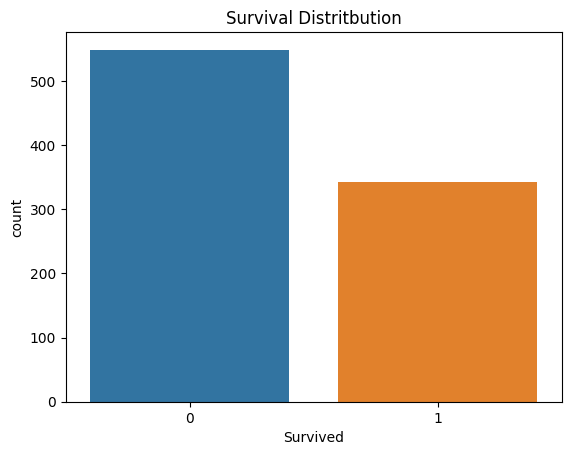

In [4]:
# Visualise the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=train)
plt.title('Survival Distritbution')
plt.show()

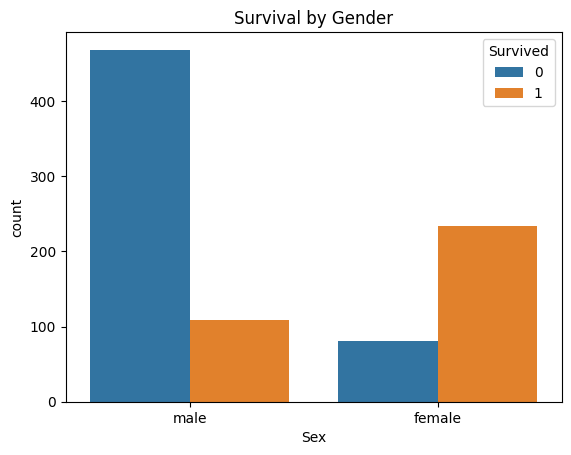

In [5]:
# Visualise survival rate by Sex
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Gender')
plt.show()

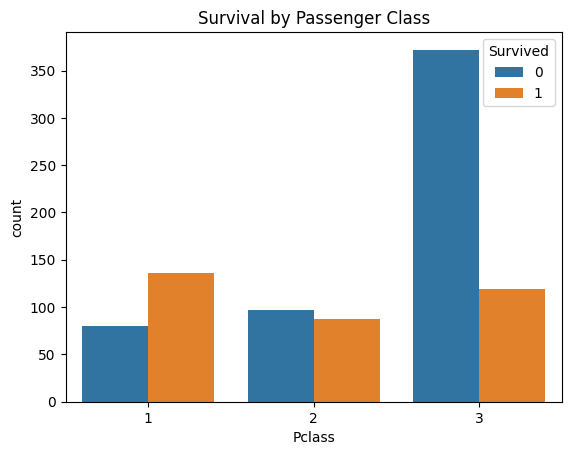

In [6]:
# Visualise survival rate by Pclass
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

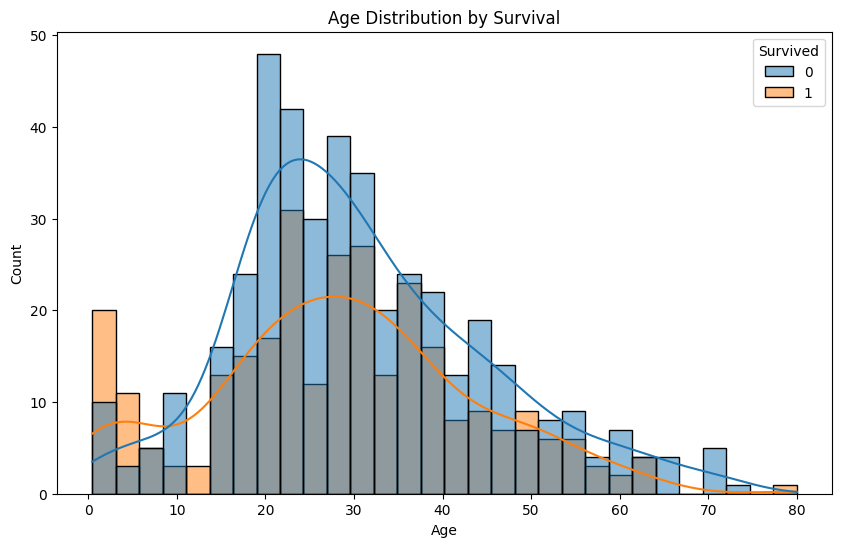

In [7]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

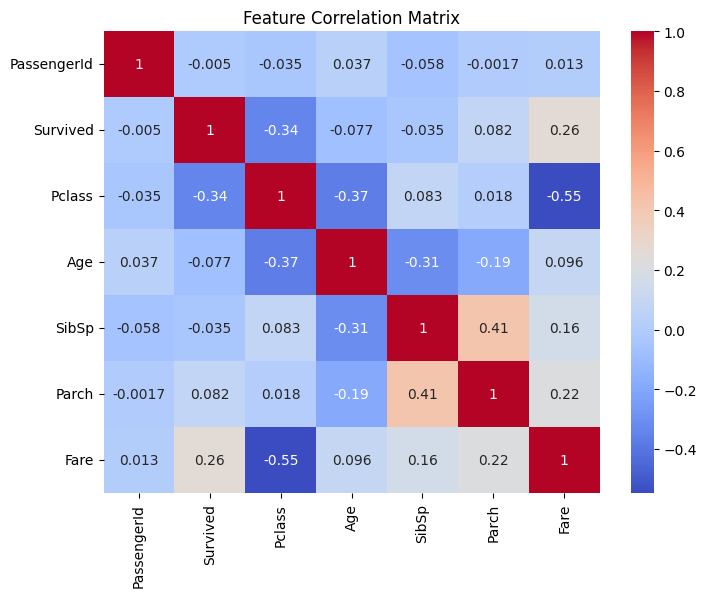

In [8]:
# Select only numeric columns
numeric_features = train.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_features.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## 4. 🔧 Data Cleaning & Preprocessing
**Missing Values**
- Age: Filled missing values with **median** to reduce outlier impact while preserving data.
- Embarked: Fill missing values with mode(most common port) to avoid data loss.
- Cabin: Dropped due to excessive missing value(~77%) and sparsity.
- Ticket: Dropoed as it contains non-numeric, high-cardinality strins not beneficial in current feature setup.

**Categorical Encoding**
- Sex: Label Encoding (male -> 0, female -> 1).
- Embarked: One-Hot Encoding.
---

In [9]:
# Fill missing Age values with median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fill missing Embracked values with mode (most common port)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
drop_cols = ['PassengerId', 'Ticket']
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)

# Encode 'Sex
sex_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

# One-hot encode 'Embarked'
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

## 5. 💡 Feature Engineering
- **Title Extraction:** Extracted titles (Mr, Mrs, Miss, etc.) from Name.
- **FamilySize:** SibSp + Parch + 1.
- Simplified Cabin feature as "Has Cabin".

---

In [10]:
# Extract Title from Name column
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
               'Rev', 'Sir', 'Jonkheer', 'Dona']

train['Title'] = train['Title'].replace(rare_titles, 'Rare')
test['Title'] = test['Title'].replace(rare_titles, 'Rare')

title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

# Fill Nan values in Title (if any)
train['Title'].fillna(4, inplace=True)
test['Title'].fillna(4, inplace=True)

# Drop Name after extracting Title
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

# Create FamiliySize feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Create binary feature: HasCabin
train['HasCabin'] = train['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
test['HasCabin'] = test['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)

# Drop Cabin after processing
train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

## 6. 🤖 Model Building & Evaluation
- Baseline Model: Logistic Regression.
- Tried: Decision Tree, Random Forest, Gradient Boosting.
- Evaluation: Accuracy, Confusion Matrix, Cross-validation scores.

---

In [11]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = train.drop('Survived', axis=1)
y = train['Survived']

# Splite into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_scaled, y_train)

# Prediction
y_pred = log_model.predict(X_valid_scaled)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Logistic Regression Accuracy: 0.7932960893854749
[[86 19]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       105
           1       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [13]:
from sklearn.tree import DecisionTreeClassifier

# Model
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Prediction
y_pred_tree = tree_model.predict(X_valid)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_valid, y_pred_tree))
print(confusion_matrix(y_valid, y_pred_tree))
print(classification_report(y_valid, y_pred_tree))

Decision Tree Accuracy: 0.8379888268156425
[[91 14]
 [15 59]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred_rf = rf_model.predict(X_valid)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_valid, y_pred_rf))
print(confusion_matrix(y_valid, y_pred_rf))
print(classification_report(y_valid, y_pred_rf))

Random Forest Accuracy: 0.8324022346368715
[[92 13]
 [17 57]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Model 
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Prediction
y_pred_gb = gb_model.predict(X_valid)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_valid, y_pred_gb))
print(confusion_matrix(y_valid, y_pred_gb))
print(classification_report(y_valid, y_pred_gb))

Gradient Boosting Accuracy: 0.8100558659217877
[[91 14]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [16]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Random Forest Cross-validation scores: [0.83240223 0.78089888 0.84269663 0.7752809  0.82022472]
Mean CV Score: 0.8103006716464755


| Model                  | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Notes                                          |
|-----------------------|---------:|-------------------:|----------------:|------------------:|:-----------------------------------------------|
| Logistic Regression    | 79.3%    | 0.75               | 0.76            | 0.75              | Baseline, simple and interpretable             |
| Decision Tree          | **83.8%**| 0.81               | 0.80            | 0.80              | Highest accuracy, interpretable, slight risk of overfitting |
| Random Forest          | 83.2%    | 0.81               | 0.77            | 0.79              | Robust, stable, good generalisation, feature importance available |
| Gradient Boosting      | 81.0%    | 0.79               | 0.73            | 0.76              | Good performance, needs hyperparameter tuning  |
| Random Forest CV (Mean)| 81.0%    | -                  | -               | -                 | Most stable generalisation (via cross-validation) |

## 7. 🚀 Final Prediction & Submission
- Best performing model applied to `test.csv`.
- Generated submission file: `submission.csv`.

---

In [17]:
# Retrain Random Forest on full training set (no split)
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [18]:
# Fill missing Fare with median (consistent with train)
test['Fare'].fillna(train['Fare'].median(), inplace=True)

# Predict
test_predictions = final_model.predict(test)

In [19]:
# Load original test dataest to get PassengerId
original_test = pd.read_csv('/kaggle/input/titanic/test.csv')

submission = pd.DataFrame({
    'PassengerId': original_test['PassengerId'],
    'Survived': test_predictions
})

# Save submission file
submission.to_csv('submission.csv', index=False)


## 8. 📈 Key Insights
- Female & 1st class passengers had higher survival.
- Family size impacts survival chances.
- Title is a strong predictor.

---

## 9. 🔥 Future Work
- Try XGBoost, LightGBM.
- Hyperparameter tuning.
- External datasets integration.